<a href="https://colab.research.google.com/github/sakshi685/NLP-Assignments/blob/main/Sakshi_2301201200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1: Character-Level NLP

Top 10 most common characters: [('e', 21), ('t', 20), ('a', 19), ('s', 18), ('i', 17), ('n', 16), ('o', 10), ('l', 10), ('d', 10), ('r', 9)]


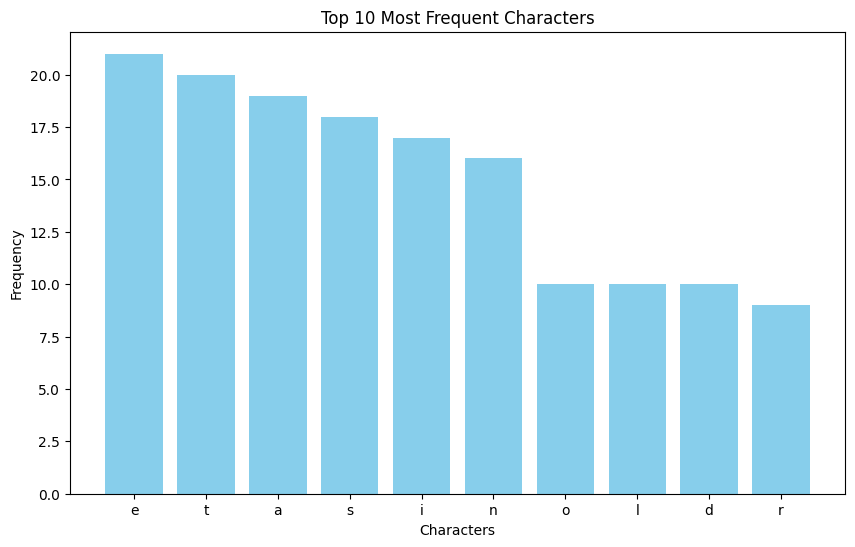

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import string

# 1. Input paragraph
text = "The quick brown fox jumps over the lazy dog. This is a classic pangram, often used to display fonts and test typewriters. NLP, a field of AI, helps machines understand human language. It is a very interesting field. Did you know that 123 is a number? Let's analyze this text."

# 2. Tokenize into characters, remove punctuation and digits
#    and count frequency
chars = [c.lower() for c in text if c.isalpha()]
freq = Counter(chars)

# 3. Print the top 10 most common characters
print("Top 10 most common characters:", freq.most_common(10))

# 4. Plot a bar chart
top_10 = freq.most_common(10)
characters = [c for c, _ in top_10]
counts = [count for _, count in top_10]

plt.figure(figsize=(10, 6))
plt.bar(characters, counts, color='skyblue')
plt.title('Top 10 Most Frequent Characters')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

Assignment 2: News Classification with TF-IDF + SVM

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Create a sample dataset (or load from CSV)
data = {
    'text': [
        "President announces new policy.",
        "Breaking: a new star discovered.",
        "Exclusive report: inflation is rising.",
        "Shocking headline: world peace achieved!",
        "Local sports team wins big game.",
        "This is totally fake news. Don't believe it.",
        "Conspiracy theory about aliens.",
        "Important announcement from NASA."
    ],
    'label': ['real', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'real']
}
df = pd.DataFrame(data)

# 2. Preprocess and convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# 4. Make predictions and print results
y_pred = svm_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Confusion Matrix:
 [[0 1]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

        fake       0.00      0.00      0.00         1
        real       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Assignment 3: Text Generation with Markov Chains

In [ ]:
import random
from collections import defaultdict

# 1. Input text file content
# For this example, we'll use a string. In a real scenario, you'd read a file.
text = """Once upon a time, in a far-off land, there lived a brave knight named Sir Reginald. He was known for his courage and his unwavering loyalty. The kingdom was under a dark spell, and only Sir Reginald could break it. He rode his trusty steed, searching for the enchanted sword. The journey was long and perilous, but he never gave up. Finally, he found the sword and vanquished the evil sorcerer, bringing peace back to the land."""

# Clean the text
words = text.lower().replace('.', '').replace(',', '').split()

# Build a bigram language model (Markov chain)
model = defaultdict(list)
for current_word, next_word in zip(words[:-1], words[1:]):
    model[current_word].append(next_word)

# 2. Generate 5 random sentences
def generate_sentence(model, start_word=None, max_length=15):
    if not start_word:
        start_word = random.choice(list(model.keys()))

    sentence = [start_word]
    current_word = start_word

    for _ in range(max_length - 1):
        if current_word in model and model[current_word]:
            next_word = random.choice(model[current_word])
            sentence.append(next_word)
            current_word = next_word
        else:
            break

    return ' '.join(sentence)

print("Generated Sentences:")
generated_sentences = []
for _ in range(5):
    sentence = generate_sentence(model)
    generated_sentences.append(sentence)
    print(sentence)

# 3. Compare with original text length distribution
original_sentence_lengths = [len(s.split()) for s in text.split('.')]
generated_sentence_lengths = [len(s.split()) for s in generated_sentences]

print("\nOriginal Sentence Lengths:", original_sentence_lengths)
print("Generated Sentence Lengths:", generated_sentence_lengths)
print(f"Original text has an average sentence length of {sum(original_sentence_lengths) / len(original_sentence_lengths):.2f} words.")
print(f"Generated text has an average sentence length of {sum(generated_sentence_lengths) / len(generated_sentence_lengths):.2f} words.")

Generated Sentences:
for the kingdom was under a far-off land there lived a far-off land there lived
courage and perilous but he never gave up finally he found the evil sorcerer bringing
only sir reginald he never gave up finally he found the sword and only sir
lived a brave knight named sir reginald could break it he never gave up finally
but he found the journey was known for his unwavering loyalty the land there lived

Original Sentence Lengths: [16, 10, 14, 10, 11, 16, 0]
Generated Sentence Lengths: [15, 15, 15, 15, 15]
Original text has an average sentence length of 11.00 words.
Generated text has an average sentence length of 15.00 words.
